In [27]:
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
h.columns

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
h=pd.read_csv("/content/drive/MyDrive/程式/Exploring Mental Health Data/train.csv")
str_dict_city = {}
a=0

for i in h['City'].unique():
  str_dict_city[i] = a
  a+=1
h=h.iloc[:,2:]
h['Gender']=h['Gender'].map({'Female':0,'Male':1})
h=h.drop(['Profession','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Degree'],axis=1)
h['City']=h['City'].map(str_dict_city)
h['Working Professional or Student']=h['Working Professional or Student'].map({"Working Professional":0,'Student':1})
str_dict_Sleep = {}
a=0

for i in h['Sleep Duration'].unique():
  str_dict_Sleep[i] = a
  a+=1
h['Sleep Duration']=h['Sleep Duration'].map(str_dict_Sleep)
str_dict_habit = {}
a=0
for i in h['Dietary Habits'].unique():
  str_dict_habit[i] = a
  a+=1
h['Dietary Habits']=h['Dietary Habits'].map(str_dict_habit)
h['Have you ever had suicidal thoughts ?']=h['Have you ever had suicidal thoughts ?'].map({'No':0,'Yes':1})
h['Family History of Mental Illness']=h['Family History of Mental Illness'].map({'No':0,'Yes':1})
h=h.dropna()

In [ ]:
# 看空值
h=pd.read_csv("/content/drive/MyDrive/程式/Exploring Mental Health Data/train.csv")
h.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [ ]:
h.head()

,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,0,0,0,0,0,1.0,2.0,0,0
1,1,26.0,1,0,1,1,1,7.0,3.0,0,1
2,1,33.0,2,1,2,0,1,3.0,1.0,0,1
3,1,22.0,3,0,1,2,1,10.0,1.0,1,1
4,0,30.0,4,0,2,1,1,9.0,4.0,1,0


([<matplotlib.patches.Wedge at 0x7dfbf0aadd20>,
 [Text(0.32696641784741576, -1.0502823247108508, '0'),
  Text(-0.3269665161819422, 1.050282294098041, '1')],
 [Text(0.1783453188258631, -0.5728812680241004, '81.8%'),
  Text(-0.17834537246287754, 0.572881251326204, '18.2%')])

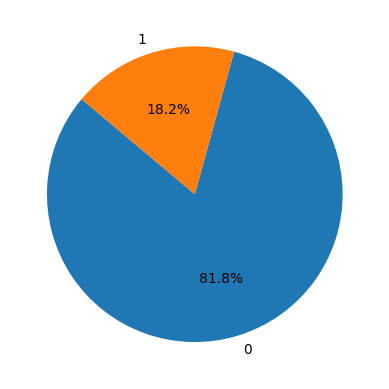

In [ ]:

labels = ['0', '1']

sizes = [115130, 25566]
# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

<ipython-input-21-b05e0eaa8241>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=h, x='Depression', palette=custom_palette)


Text(0.5, 1.0, 'Depression')

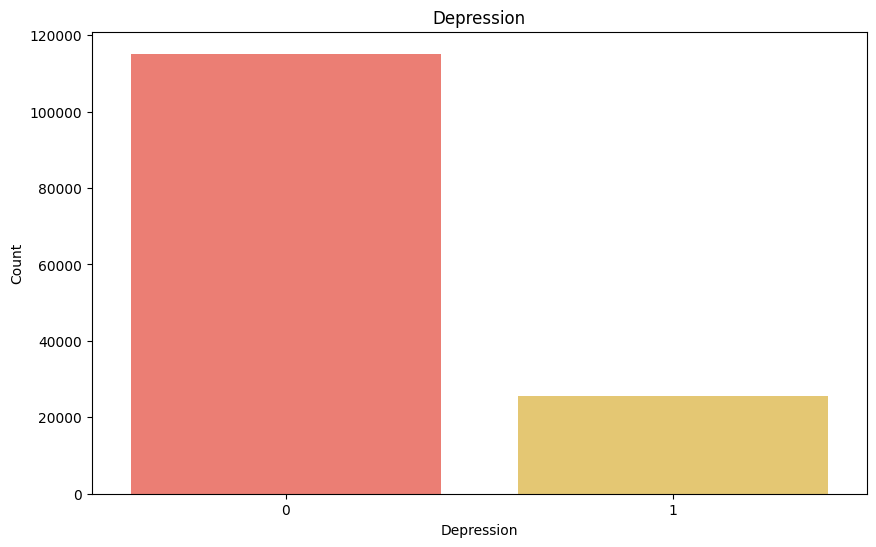

In [ ]:
custom_palette = ['#FF6D60', '#F7D060']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.countplot(data=h, x='Depression', palette=custom_palette)

# Label the x-axis
plt.xlabel('Depression')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Depression')

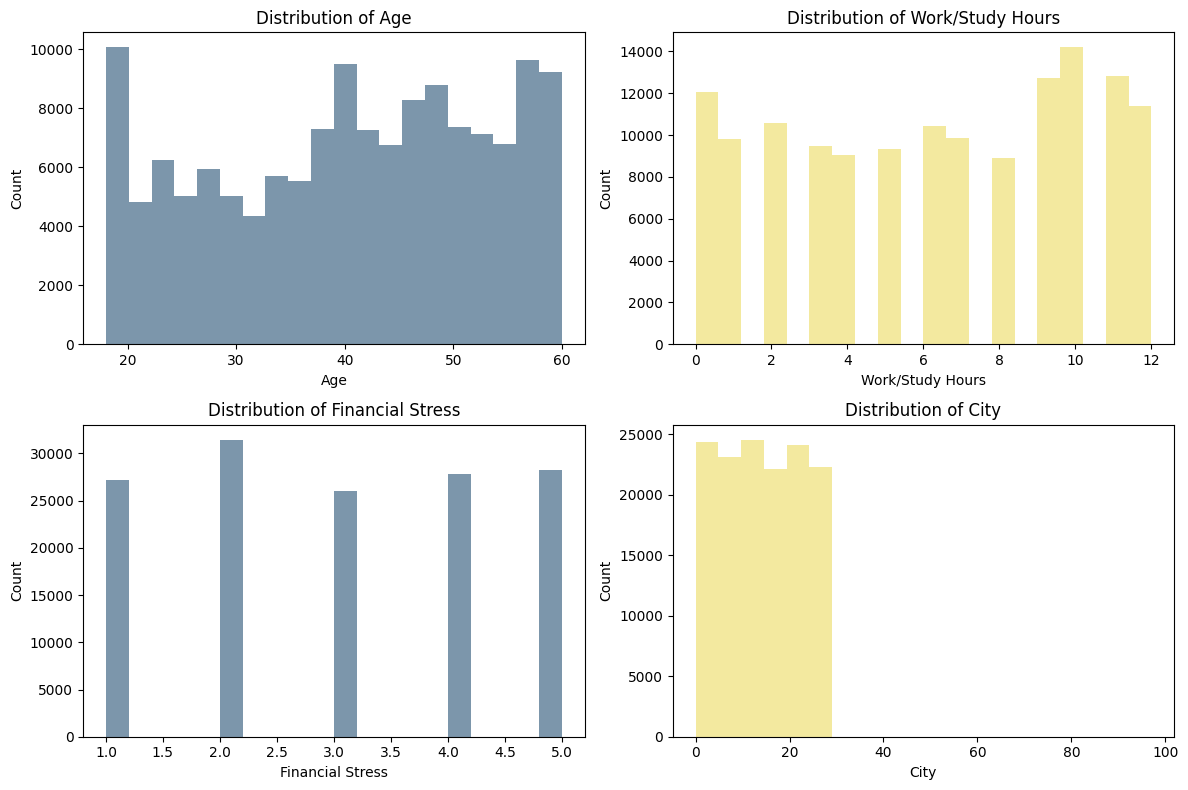

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_diasbp_max in the first subplot
axes[0, 0].hist(h['Age'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot d1_diasbp_min in the second subplot
axes[0, 1].hist(h['Work/Study Hours'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of Work/Study Hours')
axes[0, 1].set_xlabel('Work/Study Hours')
axes[0, 1].set_ylabel('Count')

# Plot h1_diasbp_max in the third subplot
axes[1, 0].hist(h['Financial Stress'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of Financial Stress')
axes[1, 0].set_xlabel('Financial Stress')
axes[1, 0].set_ylabel('Count')

# Plot h1_diasbp_min in the third subplot
axes[1, 1].hist(h['City'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of City')
axes[1, 1].set_xlabel('City')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

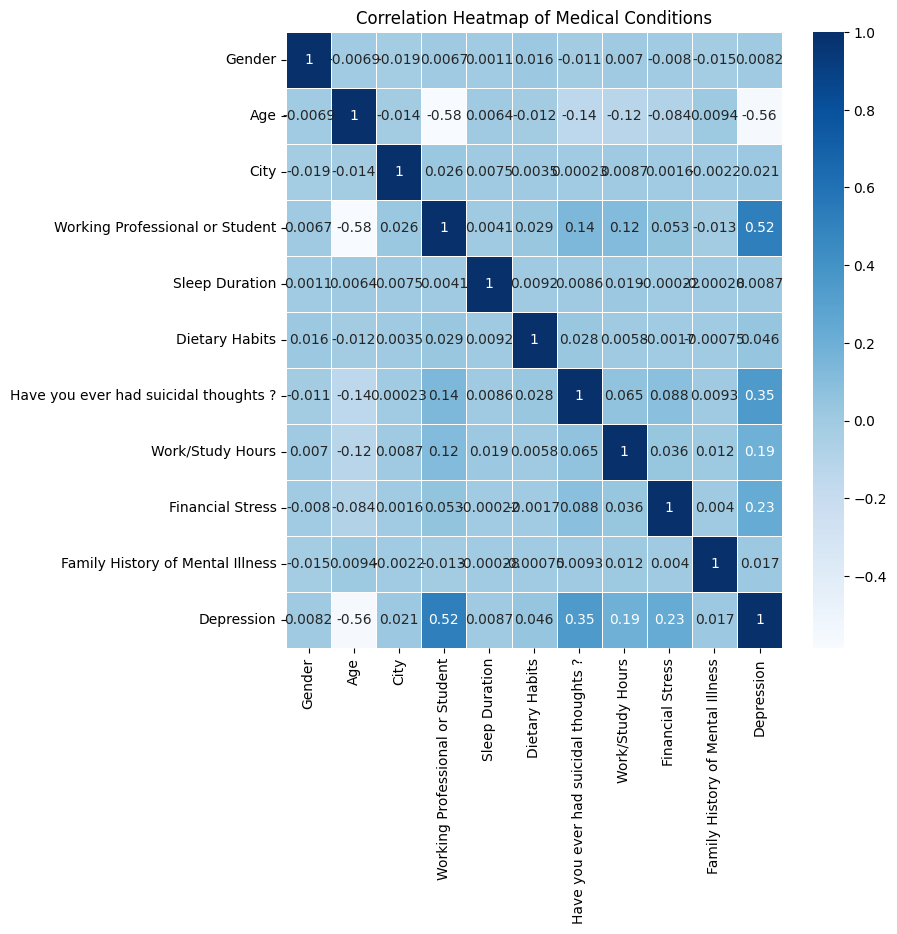

In [ ]:
# Select the binary columns
binary_columns = h

# Calculate the correlation matrix
correlation_matrix = binary_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Medical Conditions')

# Show the plot
plt.show()


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [30]:
h1=pd.concat([h[h['Depression']==0],h[h['Depression']==1],h[h['Depression']==1]])
X = h1.drop('Depression', axis=1)
y = h1['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

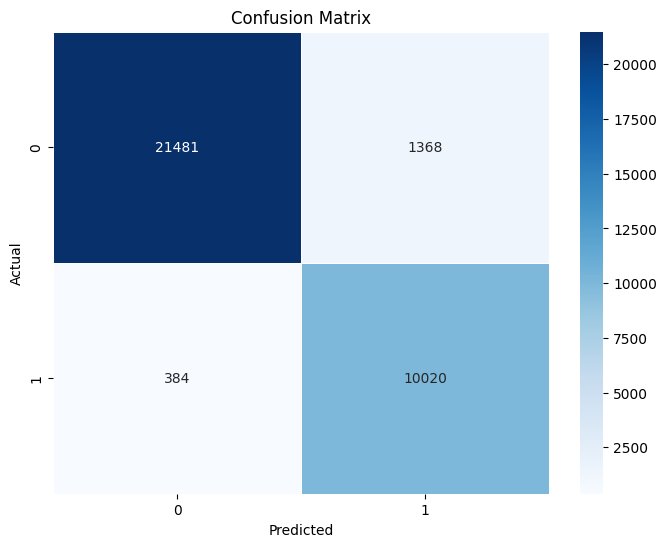

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

In [ ]:
RF_accuracy = accuracy_score(y_test, y_pred)
RF_classification_rep = classification_report(y_test, y_pred)
# NB_confusion = confusion_matrix(y_test, NB_y_pred)

# Print the results
print("RF Classification Accuracy:", RF_accuracy)
print("\nRF Classification Report:\n", RF_classification_rep)
print("\nRF Classification Confusion Matrix:\n", confusion)

RF Classification Accuracy: 0.9397834577544866

RF Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     10041
           1       0.91      0.97      0.94     10186

    accuracy                           0.94     20227
   macro avg       0.94      0.94      0.94     20227
weighted avg       0.94      0.94      0.94     20227


RF Classification Confusion Matrix:
 [[9091  950]
 [ 268 9918]]


In [31]:
time1=datetime.now()
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
RF_accuracy= accuracy_score(y_test, y_pred)
print("GradientBoosting Classification Accuracy:", RF_accuracy)
time2=datetime.now()
print((time2-time1).total_seconds())

GradientBoosting Classification Accuracy: 0.947313024388777
18.82514


In [32]:
time1=datetime.now()
RF_model = RandomForestClassifier(n_estimators=200, random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
RF_accuracy= accuracy_score(y_test, y_pred)
print("GradientBoosting Classification Accuracy:", RF_accuracy)
time2=datetime.now()
print((time2-time1).total_seconds())

GradientBoosting Classification Accuracy: 0.9474333142874327
29.289305


In [ ]:
time1=datetime.now()
RF_model = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
RF_accuracy= accuracy_score(y_test, y_pred)
print("GradientBoosting Classification Accuracy:", RF_accuracy)
time2=datetime.now()
print((time2-time1).total_seconds())


GradientBoosting Classification Accuracy: 0.9108651850960816
12.67558


In [34]:
time1=datetime.now()
GB_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)

print("GradientBoosting Classification Accuracy:", RF_accuracy)
time2=datetime.now()
print((time2-time1).total_seconds())

GradientBoosting Classification Accuracy: 0.9474333142874327
18.599722


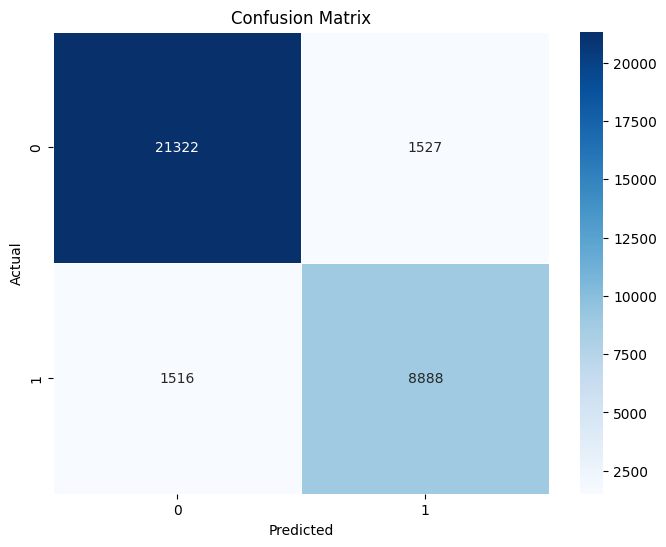

In [35]:
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

In [ ]:
RF_accuracy = accuracy_score(y_test, y_pred)
RF_classification_rep = classification_report(y_test, y_pred)
# NB_confusion = confusion_matrix(y_test, NB_y_pred)

# Print the results
print("GradientBoosting Classification Accuracy:", RF_accuracy)
print("\nGradientBoosting Classification Report:\n", RF_classification_rep)
print("\nGradientBoosting Classification Confusion Matrix:\n", confusion)

GradientBoosting Classification Accuracy: 0.9029020616008305

GradientBoosting Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     10041
           1       0.90      0.91      0.90     10186

    accuracy                           0.90     20227
   macro avg       0.90      0.90      0.90     20227
weighted avg       0.90      0.90      0.90     20227


GradientBoosting Classification Confusion Matrix:
 [[8971 1070]
 [ 894 9292]]


In [ ]:
time1=datetime.now()
GB_model = GradientBoostingClassifier(n_estimators=200,subsample=1.0, random_state=42)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print("GradientBoosting Classification Accuracy:", RF_accuracy)
time2=datetime.now()
print((time2-time1).total_seconds())

GradientBoosting Classification Accuracy: 0.904088594452959
26.595739


In [ ]:
time1=datetime.now()
GB_model = GradientBoostingClassifier(n_estimators=100,subsample=0.9, random_state=42)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print("GradientBoosting Classification Accuracy:", RF_accuracy)
time2=datetime.now()
print((time2-time1).total_seconds())

GradientBoosting Classification Accuracy: 0.9028526227319918
7.02483


In [ ]:
time1=datetime.now()
GB_model = GradientBoostingClassifier(n_estimators=100,subsample=0.5, random_state=42)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print("GradientBoosting Classification Accuracy:", RF_accuracy)
time2=datetime.now()
print((time2-time1).total_seconds())

GradientBoosting Classification Accuracy: 0.9038414001087655
6.001124


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
# h=pd.read_csv("b_lvr_land_a1.csv")
h=pd.read_csv("/content/drive/MyDrive/程式/Exploring Mental Health Data/test.csv")
str_dict_city = {}
a=0

for i in h['City'].unique():
  str_dict_city[i] = a
  a+=1
h=h.iloc[:,2:]
h['Gender']=h['Gender'].map({'Female':0,'Male':1})
h['Degree']=h['Degree'].fillna(h['Degree'].mode()[0])
h=h.drop(['Profession','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Degree'],axis=1)
h['City']=h['City'].map(str_dict_city)
h['Working Professional or Student']=h['Working Professional or Student'].map({"Working Professional":0,'Student':1})
str_dict_Sleep = {}
a=0

for i in h['Sleep Duration'].unique():
  str_dict_Sleep[i] = a
  a+=1
h['Sleep Duration']=h['Sleep Duration'].map(str_dict_Sleep)
str_dict_habit = {}
a=0
for i in h['Dietary Habits'].unique():
  str_dict_habit[i] = a
  a+=1
h['Dietary Habits']=h['Dietary Habits'].map(str_dict_habit)
h['Have you ever had suicidal thoughts ?']=h['Have you ever had suicidal thoughts ?'].map({'No':0,'Yes':1})
h['Family History of Mental Illness']=h['Family History of Mental Illness'].map({'No':0,'Yes':1})
h['Dietary Habits']=h['Dietary Habits'].fillna(h['Dietary Habits'].mode()[0])

# h=h.dropna()

,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,0,0,0,0,0,9.0,3.0,1
1,0,58.0,1,0,0,0,0,6.0,4.0,0
2,1,53.0,2,0,1,0,1,12.0,4.0,0
3,0,23.0,3,1,2,0,1,10.0,4.0,0
4,1,47.0,4,0,1,0,1,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...
93795,0,49.0,2,0,0,0,1,2.0,2.0,1
93796,1,29.0,28,0,1,0,1,11.0,3.0,1
93797,1,24.0,0,1,1,0,0,7.0,1.0,0
93798,0,23.0,4,0,3,1,1,7.0,5.0,1


In [ ]:
y_pred_k = GB_model.predict(h)

In [ ]:
h=pd.read_csv("/content/drive/MyDrive/程式/Exploring Mental Health Data/test.csv")
h['Depression']=y_pred_k

In [ ]:
h[['id','Depression']].to_csv('s.csv',index=False)

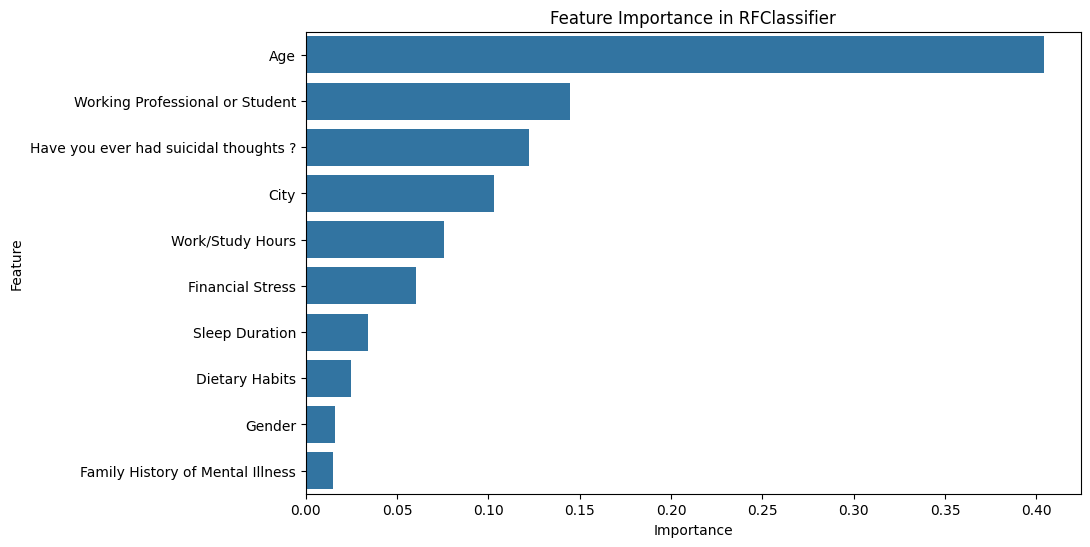

In [41]:
importances = RF_model.feature_importances_

# 創建一個DataFrame來顯示特徵名稱和其重要性
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# 排序並繪圖
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 繪製條形圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in RFClassifier")
plt.show()

TypeError: 'property' object is not callable

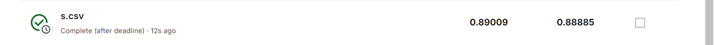